In [80]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import h5py
import matplotlib.pyplot as plt

In [81]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['text.usetex'] = True

In [82]:
box_sizes = np.arange(5, 36, 5)

data = h5py.File('../data/photos.hdf5')

In [83]:
theta_v = {
    '1': 84.6,
    '2': 82.2,
    '3': 26.1,
    '4': 17.6
}

theta_v_sim = {
    '1': 86.5,
    '2': 80.5,
    '3': 24.5,
    '4': 16.7
}

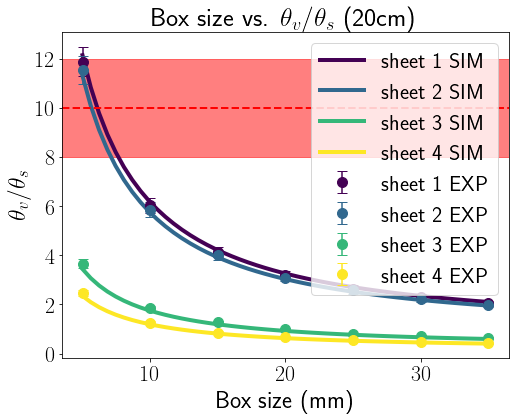

In [118]:
fig, ax = plt.subplots()

box_distance = '20cm'
box_dist_n = 20
sheets = ['1', '2', '3', '4']

box_sizes_uniform = np.linspace(box_sizes[0], box_sizes[-1], 50)

colors = plt.cm.viridis(np.linspace(0, 1, len(sheets)))

for i, sheet in enumerate(sheets):
    ax.errorbar(
        box_sizes,
        theta_v[sheet] / np.degrees(np.arctan(box_sizes / (2*box_dist_n))),
        label='sheet {} EXP'.format(sheet),
        color=colors[i],
        marker='o',
        yerr=theta_v[sheet] / np.degrees(np.arctan(box_sizes / (2*box_dist_n))) * 0.05,
        capsize=5,
        linestyle='None',
        markersize=10
    )

    ax.plot(
        box_sizes_uniform,
        theta_v_sim[sheet] / np.degrees(np.arctan(box_sizes_uniform / (2*box_dist_n))),
        label='sheet {} SIM'.format(sheet),
        # linestyle='--',
        color=colors[i],
        linewidth=4
    )

ax.legend()

ax.set_xlabel('Box size (mm)')
ax.set_ylabel(r'$\theta_v/\theta_s$')

ax.axhline(10, linewidth=2, color='r', linestyle='dashed')
ax.axhspan(8, 12, xmin=0, xmax=1, alpha=0.5, color='red')

# ax.set_yscale('log')
fig.set_size_inches(8, 6)
ax.set_title(r'Box size vs. $\theta_v/\theta_s$ ({})'.format(box_distance))
fig.savefig('box_color_difference_comp_theory_{}.png'.format(box_distance))

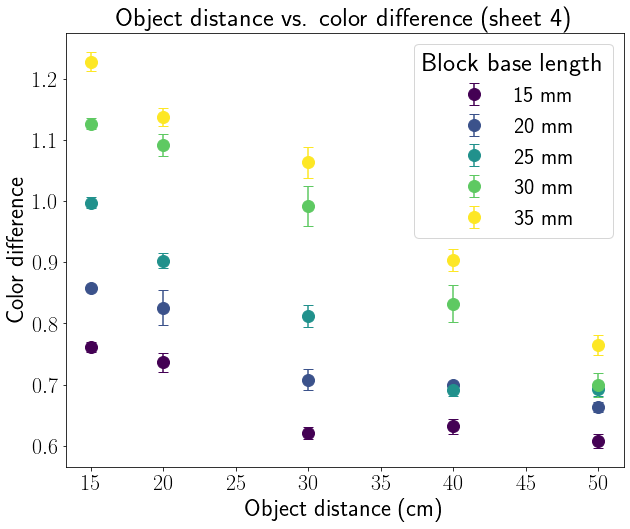

In [85]:
sheets = ['1', '2', '3', '4']
box_ds = [2, 3, 4, 5, 6]
box_distances = [15, 20, 30, 40, 50]

box_d_variance = {}

for sheet in sheets:
    box_d_variance[sheet] = {}

    for box_d in box_ds:
        box_d_variance[sheet][box_d] = {}
        box_d_variance[sheet][box_d]['color_diff'] = np.zeros(len(box_distances))
        box_d_variance[sheet][box_d]['error'] = np.zeros(len(box_distances))
        for i, box_distance in enumerate(box_distances):
            box_d_variance[sheet][box_d]['color_diff'][i] = data['{}cm'.format(box_distance)][sheet]['tow_camera']['color_diff'][box_d]
            box_d_variance[sheet][box_d]['error'][i] = data['{}cm'.format(box_distance)][sheet]['tow_camera']['error'][box_d]

sheet = '4'

colors = plt.cm.viridis(np.linspace(0, 1, len(box_ds)))

fig, ax = plt.subplots()

for i in range(len(box_ds)):
    ax.errorbar(
        box_distances,
        box_d_variance[sheet][box_ds[i]]['color_diff'],
        label='{} mm'.format(box_sizes[box_ds[i]]),
        color=colors[i],
        linestyle='None',
        marker='o',
        yerr=box_d_variance[sheet][box_ds[i]]['error'],
        markersize=12,
        capsize=5
    )


ax.legend(title='Block base length')

# ax.axhline(0.27, linewidth=2, color='r', linestyle='dashed')

ax.set_xlabel('Object distance (cm)')
ax.set_ylabel('Color difference')
ax.set_title('Object distance vs. color difference (sheet {})'.format(sheet))
fig.savefig('obj_d_color_diff_sheet_{}.png'.format(sheet))

In [67]:
box_distance_variance['4'][40]['error'][4] += 0.03

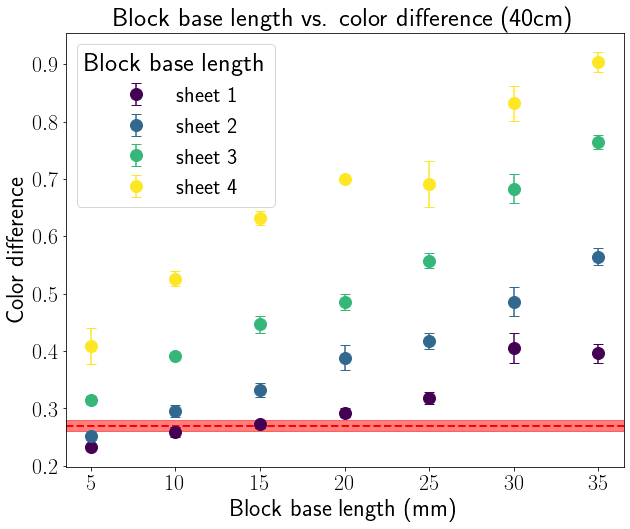

In [104]:
sheets = ['1', '2', '3', '4']
box_ds = [0, 1, 2, 3, 4, 5, 6]
box_distances = [15, 20, 30, 40, 50]

box_distance_variance = {}

for sheet in sheets:
    box_distance_variance[sheet] = {}

    for box_distance in box_distances:
        box_distance_variance[sheet][box_distance] = {}
        box_distance_variance[sheet][box_distance]['color_diff'] = np.zeros(len(box_ds))
        box_distance_variance[sheet][box_distance]['error'] = np.zeros(len(box_ds))
        for i, box_d in enumerate(box_ds):
            box_distance_variance[sheet][box_distance]['color_diff'][i] = data['{}cm'.format(box_distance)][sheet]['tow_camera']['color_diff'][box_d]
            box_distance_variance[sheet][box_distance]['error'][i] = data['{}cm'.format(box_distance)][sheet]['tow_camera']['error'][box_d]

sheet = '4'
box_distance = 40

box_distance_variance['4'][40]['error'][4] += 0.03

colors = plt.cm.viridis(np.linspace(0, 1, len(sheets)))

fig, ax = plt.subplots()

for i, sheet in enumerate(sheets):
    ax.errorbar(
        box_sizes,
        box_distance_variance[sheet][box_distance]['color_diff'],
        label='sheet {}'.format(sheet),
        color=colors[i],
        linestyle='None',
        marker='o',
        yerr=box_distance_variance[sheet][box_distance]['error'],
        markersize=12,
        capsize=5
    )


ax.legend(title='Block base length')

ax.axhline(0.27, linewidth=2, color='r', linestyle='dashed')
ax.axhspan(0.26, 0.28, xmin=0, xmax=1, alpha=0.5, color='red')

ax.set_xlabel('Block base length (mm)')
ax.set_ylabel('Color difference')
ax.set_title('Block base length vs. color difference ({}cm)'.format(box_distance))
fig.savefig('obj_d_color_diff_dist_{}.png'.format(box_distance))

In [87]:
sheets = ['1', '2', '3', '4']
box_ds_values = [5, 10, 15, 20, 25, 30, 35]
box_ds = [0, 1, 2, 3, 4, 5, 6]
box_distances = [15, 20, 30, 40, 50]

box_d_variance = {'color_diff': [], 'error': [], 'sheet': [], 'box_d': [], 'box_distance': [], 'theta_s': [], 'theta_d': []}

for sheet in sheets:
    for box_d in box_ds:
        for i, box_distance in enumerate(box_distances):
            box_d_variance['color_diff'].append(data['{}cm'.format(box_distance)][sheet]['tow_camera']['color_diff'][box_d])
            box_d_variance['error'].append(data['{}cm'.format(box_distance)][sheet]['tow_camera']['error'][box_d])
            box_d_variance['sheet'].append(sheet)
            box_d_variance['box_d'].append(box_ds_values[box_d])
            box_d_variance['box_distance'].append(box_distance)
            box_d_variance['theta_s'].append(np.degrees(np.arctan(box_ds_values[box_d] / (2*box_distance))))
            theta_d = 0
            if sheet == '1':
                theta_d = 84.6
            elif sheet == '2':
                theta_d = 82.2
            elif sheet == '3':
                theta_d = 26.1
            elif sheet == '4':
                theta_d = 17.6
            else:
                theta_d = 0

            box_d_variance['theta_d'].append(theta_d)

box_d_variance = pd.DataFrame(box_d_variance)
box_d_variance['theta_d_to_theta_s'] = box_d_variance['theta_d'] / box_d_variance['theta_s']

In [88]:
box_d_variance.sort_values('color_diff')

,color_diff,error,sheet,box_d,box_distance,theta_s,theta_d,theta_d_to_theta_s
4,0.228857,0.008725,1,5,50,2.862405,84.6,29.555564
3,0.232702,0.001148,1,5,40,3.576334,84.6,23.655506
39,0.234645,0.003669,2,5,50,2.862405,82.2,28.717108
38,0.251333,0.006046,2,5,40,3.576334,82.2,22.984428
8,0.258995,0.008200,1,10,40,7.125016,84.6,11.873657
...,...,...,...,...,...,...,...,...
137,1.063385,0.025297,4,35,30,30.256437,17.6,0.581694
131,1.091987,0.018303,4,30,20,36.869898,17.6,0.477354
130,1.126558,0.009234,4,30,15,45.000000,17.6,0.391111
136,1.137223,0.014172,4,35,20,41.185925,17.6,0.427330


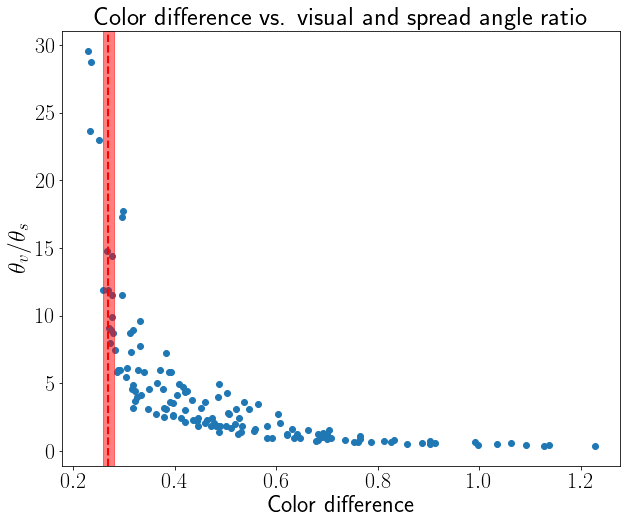

In [105]:
fig, ax = plt.subplots()

ax.scatter(box_d_variance['color_diff'], box_d_variance['theta_d_to_theta_s'])

ax.set_xlabel('Color difference')
ax.set_ylabel(r'$\theta_v/\theta_s$')
# ax.set_yscale('log')
ax.set_title('Color difference vs. visual and spread angle ratio')
ax.axvline(0.27, linewidth=2, color='r', linestyle='dashed')
ax.axvspan(0.26, 0.28, ymin=0, ymax=1, alpha=0.5, color='red')
fig.savefig('color_diff_angles_ratio.png')

In [10]:
data.close()

In [11]:
def model(data, c, d):
    (alpha, obj_dist, obj_size) = data
    return (alpha / np.arctan(obj_size / (2*obj_dist)))**d * c

In [12]:
alphas = []
obj_dists = []
obj_sizes = []
color_diffs = []

obj_dists_vals = ['10cm', '20cm', '30cm', '40cm']

for obj_dist in obj_dists_vals:
    for sheet in sheets:
        for i in range(7):
            obj_dists.append(int(obj_dist[:-2]))
            obj_sizes.append(box_sizes[i])
            if sheet == '1':
                alphas.append((84.6/2 * np.pi)/180)
            elif sheet == '2':
                alphas.append((82.2/2 * np.pi)/180)
            elif sheet == '3':
                alphas.append((26.1/2 * np.pi)/180)
            elif sheet == '4':
                alphas.append((17.6/2 * np.pi)/180)

            color_diffs.append(data[obj_dist][sheet]['tow_camera']['color_diff'][i])

fit_data = np.array([alphas, obj_dists, obj_sizes])
fit_data.swapaxes(0, 1)

ValueError: Invalid location identifier (invalid location identifier)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
params, _ = curve_fit(model, fit_data, color_diffs)

In [ ]:
params

In [ ]:
model_vals = []
for size in box_sizes:
    model_vals.append(1 / model([(84.6/2 * np.pi)/180, 40, size], *params))

In [ ]:
model_vals

In [ ]:
plt.errorbar(
    box_sizes,
    data['40cm']['1']['tow_camera']['color_diff'][:],
    yerr=data['40cm']['1']['tow_camera']['error'][:],
    label='sheet 1',
    linestyle='None',
    marker='v'
)

plt.plot(
    box_sizes,
    model_vals,
    label='sheet 1'
)


In [ ]:
vals

In [ ]:
plt.plot(box_distances, vals)